In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [ ]:
#hyper

latent_dim = 100
batch_size = 128
lr = 0.0002
epochs = 50
device = torch.device("cuda")

In [ ]:
device

device(type='cuda')

In [ ]:
#dataloader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5],[0.5])
])

In [ ]:
dataloader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST("./data", train=True, download=True, transform=transform),
    batch_size = batch_size, shuffle=True
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 483kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.92MB/s]


In [ ]:
#generator network
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
        nn.Linear(latent_dim, 128),
        nn.ReLU(True),
        nn.Linear(128, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(True),
        nn.Linear(256, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(True),
        nn.Linear(512, 784),
        nn.Tanh()

    )
  def forward(self, x):
    return self.net(x).view(-1, 1, 28,28)

#discriminator network

class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
        nn.Linear(784, 512),
        nn.LeakyReLU(0.2),
        nn.Linear(512, 256),
        nn.LeakyReLU(0.2),
        nn.Linear(256,1),
        nn.Sigmoid()

    )

  def forward(self, img):
    return self.net(img.view(img.size(0), -1))

In [ ]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))



Epoch 0/50 Batch 0/469 Loss D: 1.1069, loss G: 0.8434
Epoch 0/50 Batch 200/469 Loss D: 0.8319, loss G: 1.4050
Epoch 0/50 Batch 400/469 Loss D: 0.9748, loss G: 1.9036


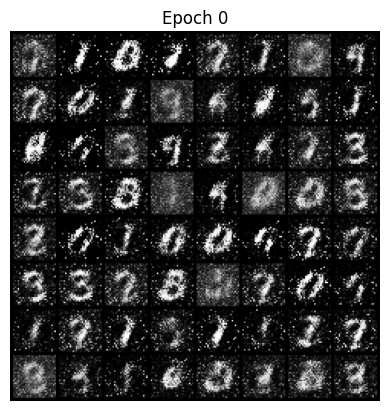

Epoch 1/50 Batch 0/469 Loss D: 1.8400, loss G: 2.6575
Epoch 1/50 Batch 200/469 Loss D: 1.1037, loss G: 1.1588
Epoch 1/50 Batch 400/469 Loss D: 0.9083, loss G: 1.2554


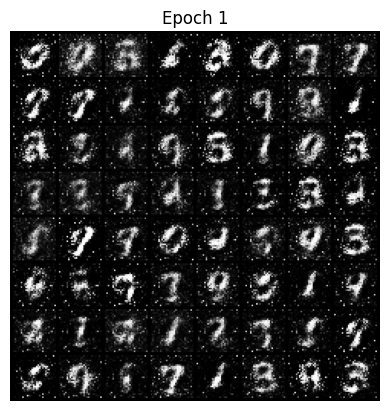

Epoch 2/50 Batch 0/469 Loss D: 0.9456, loss G: 0.7778
Epoch 2/50 Batch 200/469 Loss D: 1.2181, loss G: 0.5366
Epoch 2/50 Batch 400/469 Loss D: 1.2390, loss G: 2.9225


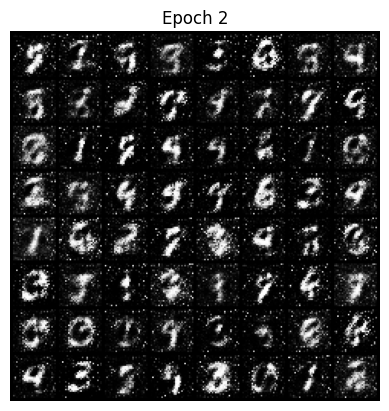

Epoch 3/50 Batch 0/469 Loss D: 0.9843, loss G: 0.9708
Epoch 3/50 Batch 200/469 Loss D: 1.0275, loss G: 1.0733
Epoch 3/50 Batch 400/469 Loss D: 1.0146, loss G: 1.8754


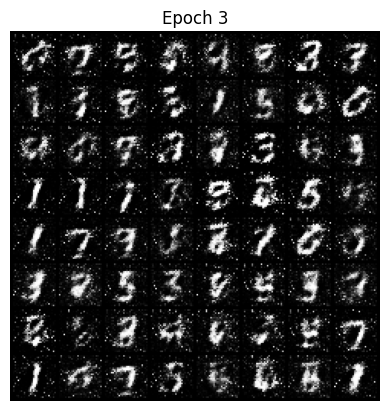

Epoch 4/50 Batch 0/469 Loss D: 1.1264, loss G: 0.7391
Epoch 4/50 Batch 200/469 Loss D: 1.2776, loss G: 2.5039
Epoch 4/50 Batch 400/469 Loss D: 1.0981, loss G: 1.8082


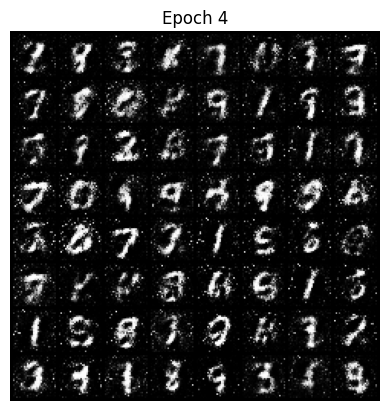

Epoch 5/50 Batch 0/469 Loss D: 1.0325, loss G: 1.8771
Epoch 5/50 Batch 200/469 Loss D: 1.5592, loss G: 2.4127
Epoch 5/50 Batch 400/469 Loss D: 1.0969, loss G: 1.7157


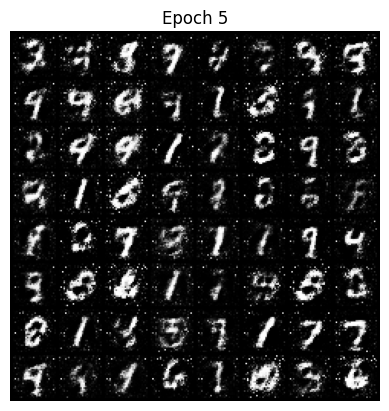

Epoch 6/50 Batch 0/469 Loss D: 0.9793, loss G: 1.2620
Epoch 6/50 Batch 200/469 Loss D: 1.0601, loss G: 1.1499
Epoch 6/50 Batch 400/469 Loss D: 0.9703, loss G: 0.9032


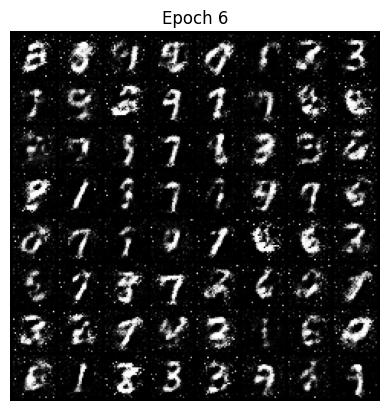

Epoch 7/50 Batch 0/469 Loss D: 0.9915, loss G: 0.9734
Epoch 7/50 Batch 200/469 Loss D: 1.1329, loss G: 0.7012
Epoch 7/50 Batch 400/469 Loss D: 1.0252, loss G: 1.1622


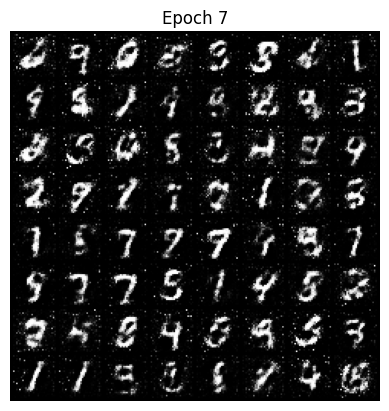

Epoch 8/50 Batch 0/469 Loss D: 1.0401, loss G: 1.0710
Epoch 8/50 Batch 200/469 Loss D: 1.0768, loss G: 1.1983
Epoch 8/50 Batch 400/469 Loss D: 1.1068, loss G: 0.8032


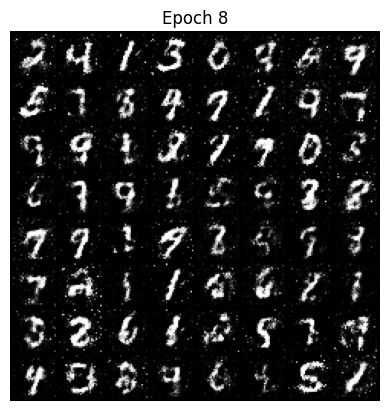

Epoch 9/50 Batch 0/469 Loss D: 1.3610, loss G: 0.6191
Epoch 9/50 Batch 200/469 Loss D: 1.0497, loss G: 1.0181
Epoch 9/50 Batch 400/469 Loss D: 1.0571, loss G: 1.3411


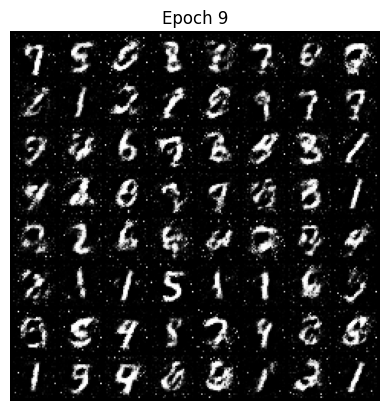

Epoch 10/50 Batch 0/469 Loss D: 1.2750, loss G: 0.5542
Epoch 10/50 Batch 200/469 Loss D: 1.0939, loss G: 0.8405
Epoch 10/50 Batch 400/469 Loss D: 1.0967, loss G: 1.0570


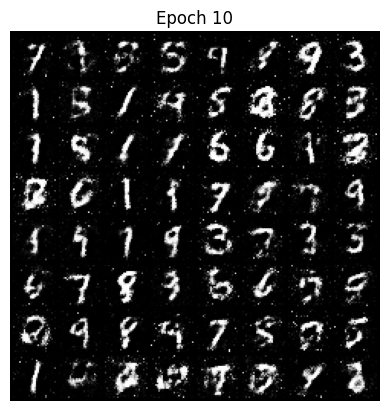

Epoch 11/50 Batch 0/469 Loss D: 1.1766, loss G: 0.7106
Epoch 11/50 Batch 200/469 Loss D: 1.3007, loss G: 1.9722
Epoch 11/50 Batch 400/469 Loss D: 1.1597, loss G: 1.2749


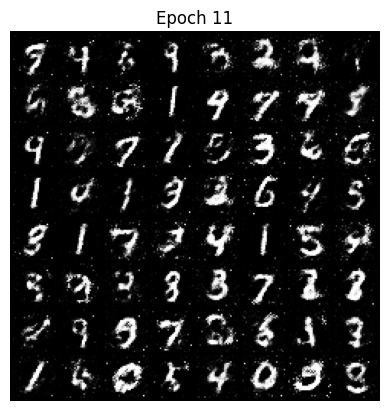

Epoch 12/50 Batch 0/469 Loss D: 1.0208, loss G: 1.5141
Epoch 12/50 Batch 200/469 Loss D: 1.0954, loss G: 1.3620
Epoch 12/50 Batch 400/469 Loss D: 1.1745, loss G: 1.2011


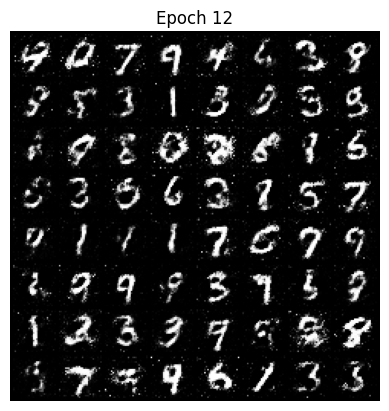

Epoch 13/50 Batch 0/469 Loss D: 1.2710, loss G: 1.6427
Epoch 13/50 Batch 200/469 Loss D: 1.0823, loss G: 1.0018
Epoch 13/50 Batch 400/469 Loss D: 1.1761, loss G: 0.9212


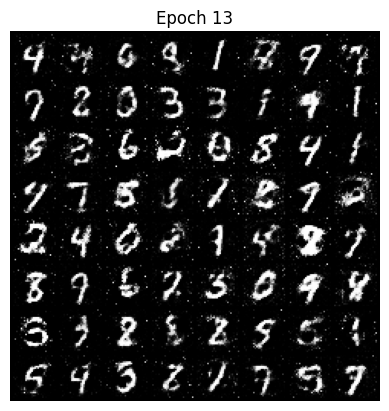

Epoch 14/50 Batch 0/469 Loss D: 1.1060, loss G: 0.7651
Epoch 14/50 Batch 200/469 Loss D: 1.2059, loss G: 1.0880
Epoch 14/50 Batch 400/469 Loss D: 1.2615, loss G: 1.7624


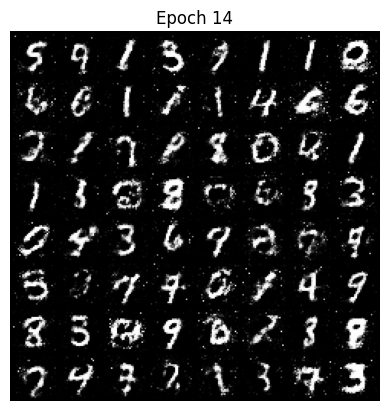

Epoch 15/50 Batch 0/469 Loss D: 1.2049, loss G: 0.7497
Epoch 15/50 Batch 200/469 Loss D: 1.1483, loss G: 1.3144
Epoch 15/50 Batch 400/469 Loss D: 1.4928, loss G: 1.6639


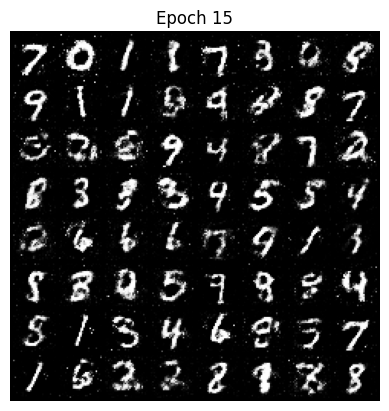

Epoch 16/50 Batch 0/469 Loss D: 1.2650, loss G: 0.6331
Epoch 16/50 Batch 200/469 Loss D: 1.2864, loss G: 0.7602
Epoch 16/50 Batch 400/469 Loss D: 1.1326, loss G: 1.1257


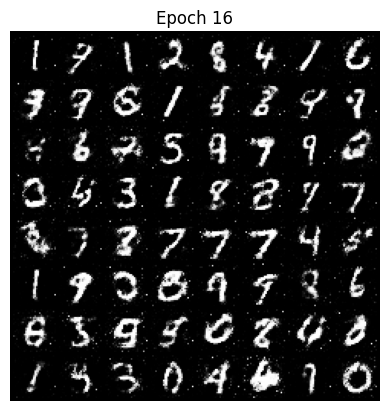

Epoch 17/50 Batch 0/469 Loss D: 1.2710, loss G: 0.7289
Epoch 17/50 Batch 200/469 Loss D: 1.2220, loss G: 0.9843
Epoch 17/50 Batch 400/469 Loss D: 1.1959, loss G: 0.8138


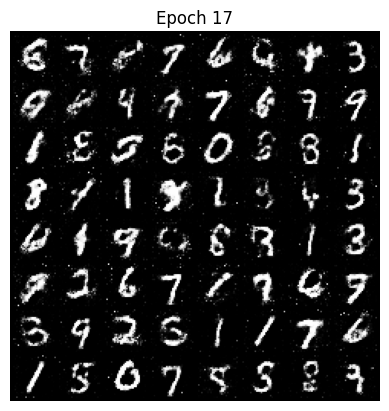

Epoch 18/50 Batch 0/469 Loss D: 1.1422, loss G: 0.9866
Epoch 18/50 Batch 200/469 Loss D: 1.2814, loss G: 0.7257
Epoch 18/50 Batch 400/469 Loss D: 1.6115, loss G: 2.1152


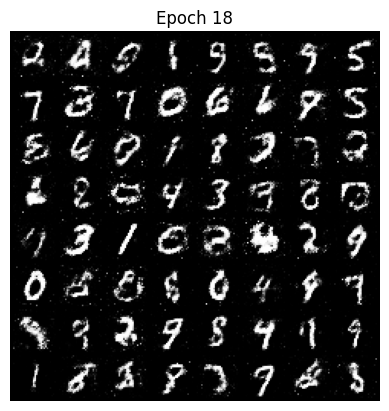

Epoch 19/50 Batch 0/469 Loss D: 1.2269, loss G: 0.6380
Epoch 19/50 Batch 200/469 Loss D: 1.2158, loss G: 1.1795
Epoch 19/50 Batch 400/469 Loss D: 1.2191, loss G: 0.6923


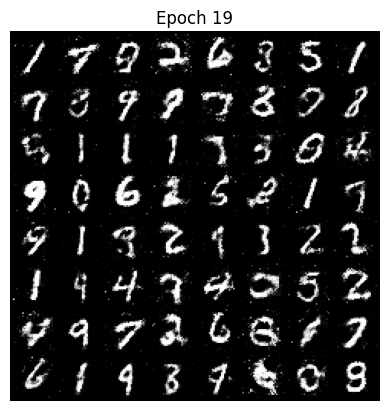

Epoch 20/50 Batch 0/469 Loss D: 1.1892, loss G: 1.0640
Epoch 20/50 Batch 200/469 Loss D: 1.2031, loss G: 0.7986
Epoch 20/50 Batch 400/469 Loss D: 1.3268, loss G: 1.4236


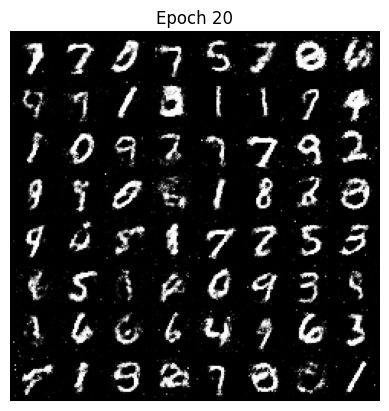

Epoch 21/50 Batch 0/469 Loss D: 1.2073, loss G: 1.2273
Epoch 21/50 Batch 200/469 Loss D: 1.2102, loss G: 0.8357
Epoch 21/50 Batch 400/469 Loss D: 1.2011, loss G: 0.9772


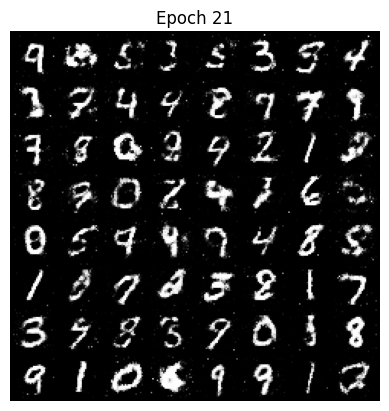

Epoch 22/50 Batch 0/469 Loss D: 1.1896, loss G: 0.9906
Epoch 22/50 Batch 200/469 Loss D: 1.4049, loss G: 0.5006
Epoch 22/50 Batch 400/469 Loss D: 1.1819, loss G: 0.9063


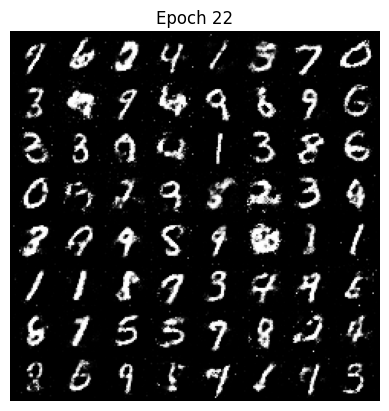

Epoch 23/50 Batch 0/469 Loss D: 1.1958, loss G: 1.2182
Epoch 23/50 Batch 200/469 Loss D: 1.2356, loss G: 1.1077
Epoch 23/50 Batch 400/469 Loss D: 1.2417, loss G: 0.8190


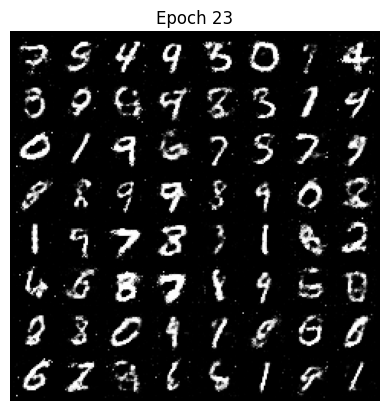

Epoch 24/50 Batch 0/469 Loss D: 1.2412, loss G: 1.2833
Epoch 24/50 Batch 200/469 Loss D: 1.3714, loss G: 0.6988
Epoch 24/50 Batch 400/469 Loss D: 1.2755, loss G: 0.8552


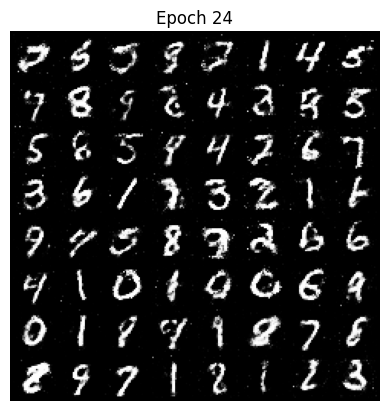

Epoch 25/50 Batch 0/469 Loss D: 1.2054, loss G: 0.8659
Epoch 25/50 Batch 200/469 Loss D: 1.2665, loss G: 0.6012
Epoch 25/50 Batch 400/469 Loss D: 1.1932, loss G: 0.7763


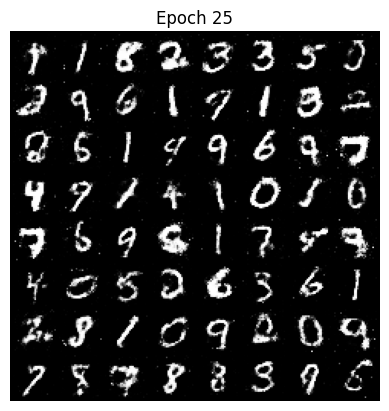

Epoch 26/50 Batch 0/469 Loss D: 1.3109, loss G: 0.8969
Epoch 26/50 Batch 200/469 Loss D: 1.2658, loss G: 0.7240
Epoch 26/50 Batch 400/469 Loss D: 1.3211, loss G: 1.0451


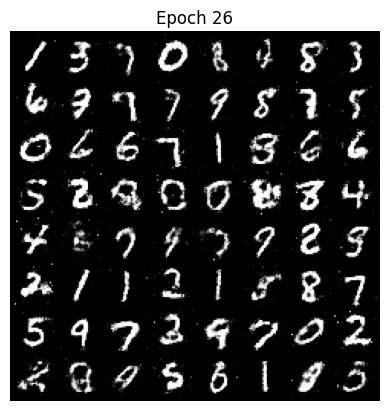

Epoch 27/50 Batch 0/469 Loss D: 1.2011, loss G: 0.8476
Epoch 27/50 Batch 200/469 Loss D: 1.2920, loss G: 1.0682
Epoch 27/50 Batch 400/469 Loss D: 1.2508, loss G: 0.9960


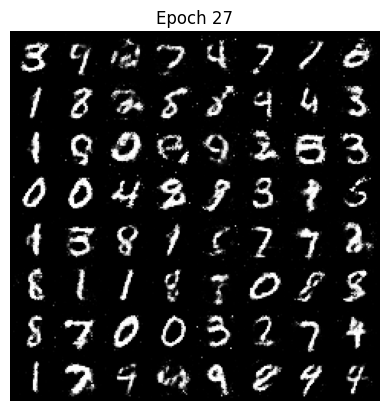

Epoch 28/50 Batch 0/469 Loss D: 1.2901, loss G: 0.9264
Epoch 28/50 Batch 200/469 Loss D: 1.2576, loss G: 0.8215
Epoch 28/50 Batch 400/469 Loss D: 1.2419, loss G: 0.9354


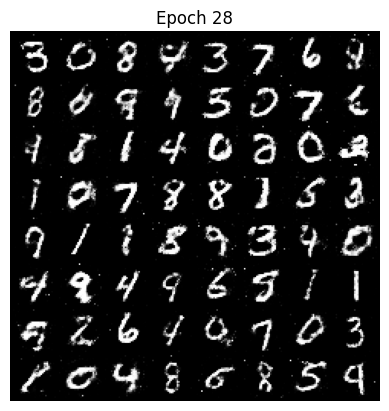

Epoch 29/50 Batch 0/469 Loss D: 1.2606, loss G: 0.6195
Epoch 29/50 Batch 200/469 Loss D: 1.3111, loss G: 1.1106
Epoch 29/50 Batch 400/469 Loss D: 1.2447, loss G: 0.6948


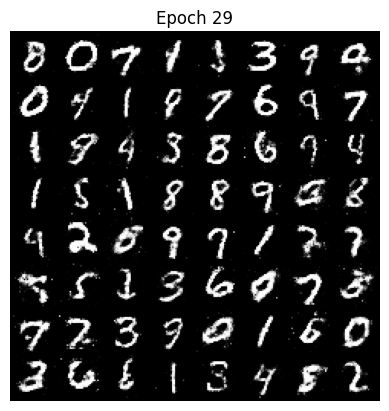

Epoch 30/50 Batch 0/469 Loss D: 1.2869, loss G: 0.5955
Epoch 30/50 Batch 200/469 Loss D: 1.2582, loss G: 1.0021
Epoch 30/50 Batch 400/469 Loss D: 1.2460, loss G: 0.9947


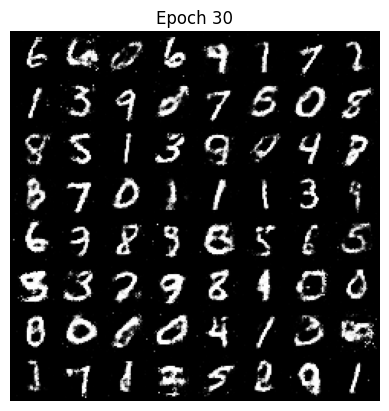

Epoch 31/50 Batch 0/469 Loss D: 1.2524, loss G: 1.0464
Epoch 31/50 Batch 200/469 Loss D: 1.2154, loss G: 0.7116
Epoch 31/50 Batch 400/469 Loss D: 1.3872, loss G: 1.1841


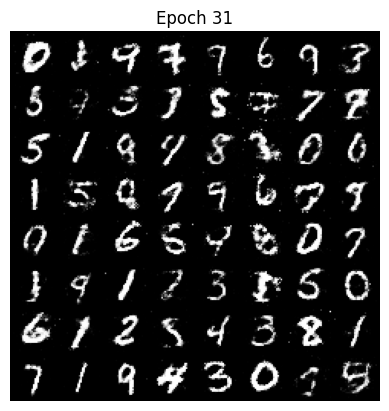

Epoch 32/50 Batch 0/469 Loss D: 1.2889, loss G: 1.1035
Epoch 32/50 Batch 200/469 Loss D: 1.2421, loss G: 0.9816
Epoch 32/50 Batch 400/469 Loss D: 1.2625, loss G: 0.7693


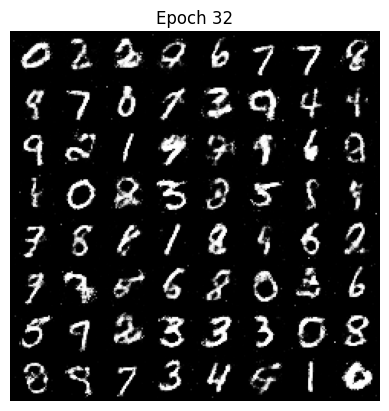

Epoch 33/50 Batch 0/469 Loss D: 1.3371, loss G: 0.6304
Epoch 33/50 Batch 200/469 Loss D: 1.3167, loss G: 0.6813
Epoch 33/50 Batch 400/469 Loss D: 1.2727, loss G: 0.6864


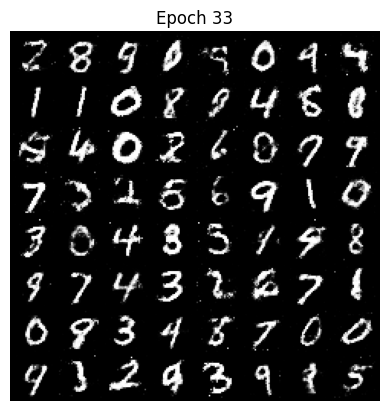

Epoch 34/50 Batch 0/469 Loss D: 1.2815, loss G: 1.0270
Epoch 34/50 Batch 200/469 Loss D: 1.3891, loss G: 0.6150
Epoch 34/50 Batch 400/469 Loss D: 1.2476, loss G: 0.9263


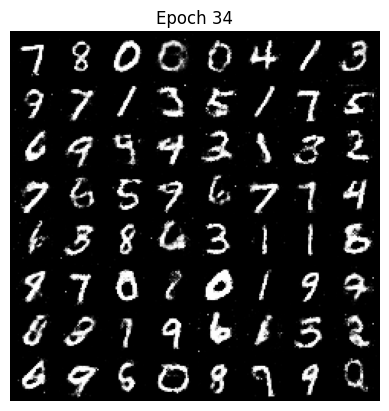

Epoch 35/50 Batch 0/469 Loss D: 1.3069, loss G: 0.9597
Epoch 35/50 Batch 200/469 Loss D: 1.2385, loss G: 0.7860
Epoch 35/50 Batch 400/469 Loss D: 1.2119, loss G: 0.9408


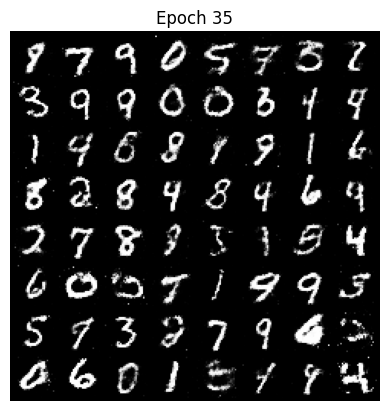

Epoch 36/50 Batch 0/469 Loss D: 1.2533, loss G: 0.9069
Epoch 36/50 Batch 200/469 Loss D: 1.2681, loss G: 1.0953
Epoch 36/50 Batch 400/469 Loss D: 1.2931, loss G: 0.7448


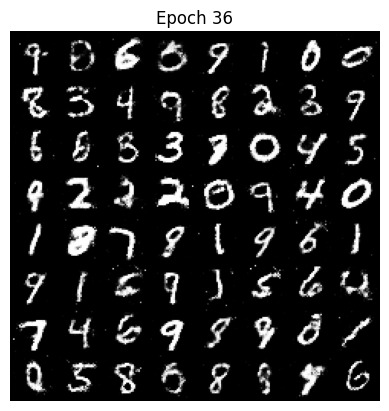

Epoch 37/50 Batch 0/469 Loss D: 1.2905, loss G: 0.8940
Epoch 37/50 Batch 200/469 Loss D: 1.3942, loss G: 0.9908
Epoch 37/50 Batch 400/469 Loss D: 1.2516, loss G: 1.0692


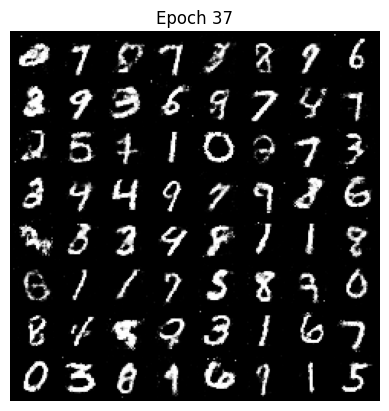

Epoch 38/50 Batch 0/469 Loss D: 1.2500, loss G: 0.7698
Epoch 38/50 Batch 200/469 Loss D: 1.2782, loss G: 0.7739
Epoch 38/50 Batch 400/469 Loss D: 1.2491, loss G: 1.0248


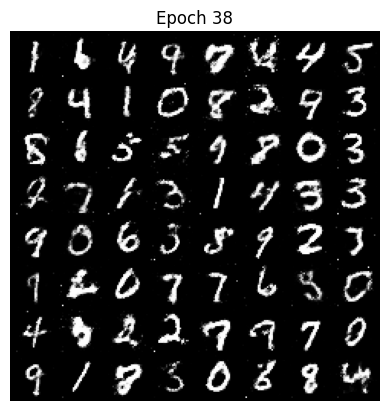

Epoch 39/50 Batch 0/469 Loss D: 1.2872, loss G: 0.7982
Epoch 39/50 Batch 200/469 Loss D: 1.2862, loss G: 0.9834
Epoch 39/50 Batch 400/469 Loss D: 1.2892, loss G: 0.8675


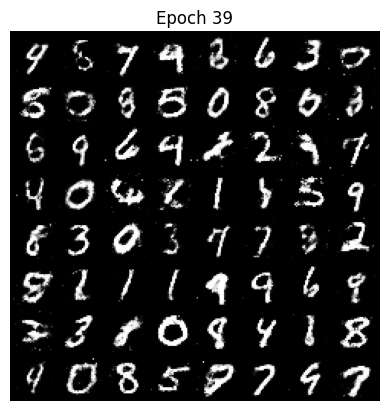

Epoch 40/50 Batch 0/469 Loss D: 1.2743, loss G: 0.7012
Epoch 40/50 Batch 200/469 Loss D: 1.2786, loss G: 1.0320
Epoch 40/50 Batch 400/469 Loss D: 1.2648, loss G: 0.8344


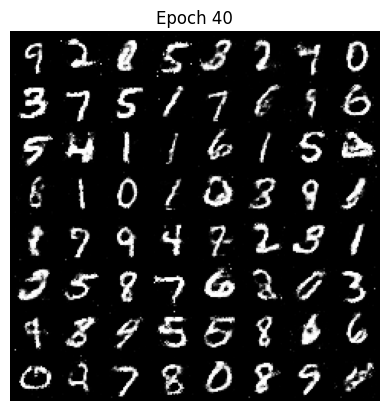

Epoch 41/50 Batch 0/469 Loss D: 1.2504, loss G: 0.6670
Epoch 41/50 Batch 200/469 Loss D: 1.3526, loss G: 1.4442
Epoch 41/50 Batch 400/469 Loss D: 1.3899, loss G: 1.2240


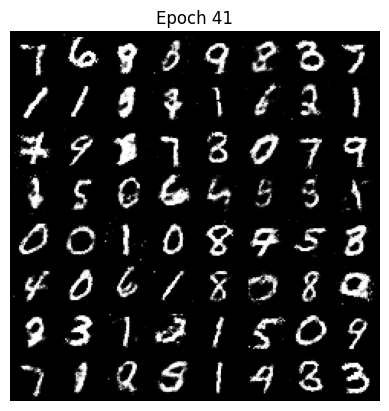

Epoch 42/50 Batch 0/469 Loss D: 1.2745, loss G: 0.6459
Epoch 42/50 Batch 200/469 Loss D: 1.2522, loss G: 0.7251
Epoch 42/50 Batch 400/469 Loss D: 1.2735, loss G: 0.8886


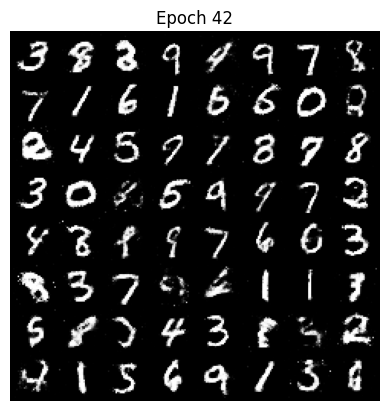

Epoch 43/50 Batch 0/469 Loss D: 1.2691, loss G: 0.7889
Epoch 43/50 Batch 200/469 Loss D: 1.2884, loss G: 0.7310
Epoch 43/50 Batch 400/469 Loss D: 1.3097, loss G: 0.7661


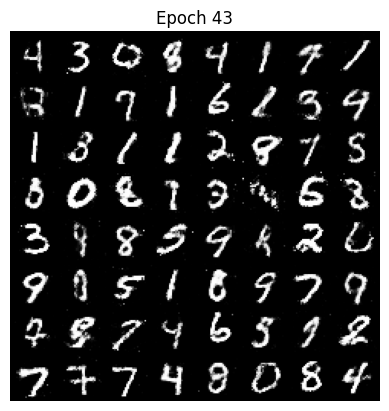

Epoch 44/50 Batch 0/469 Loss D: 1.2660, loss G: 0.9882
Epoch 44/50 Batch 200/469 Loss D: 1.3068, loss G: 0.9315
Epoch 44/50 Batch 400/469 Loss D: 1.4557, loss G: 1.2986


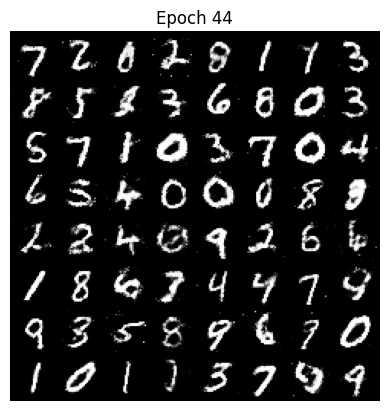

Epoch 45/50 Batch 0/469 Loss D: 1.2550, loss G: 0.7935
Epoch 45/50 Batch 200/469 Loss D: 1.3279, loss G: 0.7782
Epoch 45/50 Batch 400/469 Loss D: 1.3044, loss G: 0.6638


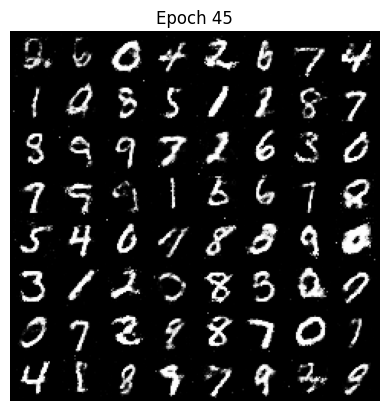

Epoch 46/50 Batch 0/469 Loss D: 1.2925, loss G: 0.8079
Epoch 46/50 Batch 200/469 Loss D: 1.2223, loss G: 0.8801
Epoch 46/50 Batch 400/469 Loss D: 1.3405, loss G: 0.7986


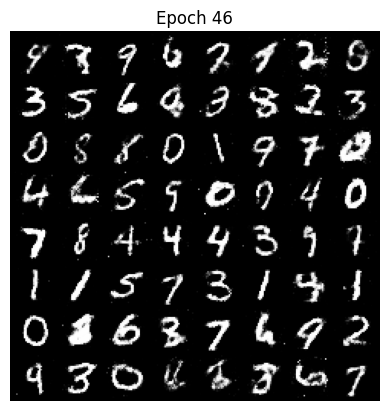

Epoch 47/50 Batch 0/469 Loss D: 1.2190, loss G: 0.7891
Epoch 47/50 Batch 200/469 Loss D: 1.2352, loss G: 1.0153
Epoch 47/50 Batch 400/469 Loss D: 1.3101, loss G: 1.0151


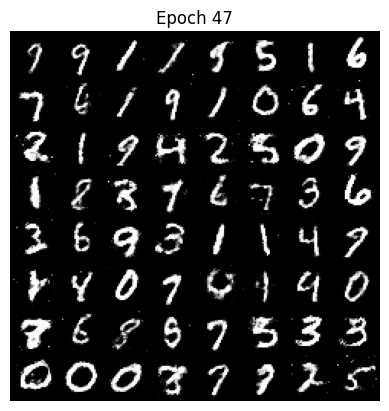

Epoch 48/50 Batch 0/469 Loss D: 1.3080, loss G: 0.9318
Epoch 48/50 Batch 200/469 Loss D: 1.3148, loss G: 0.6863
Epoch 48/50 Batch 400/469 Loss D: 1.3237, loss G: 0.7794


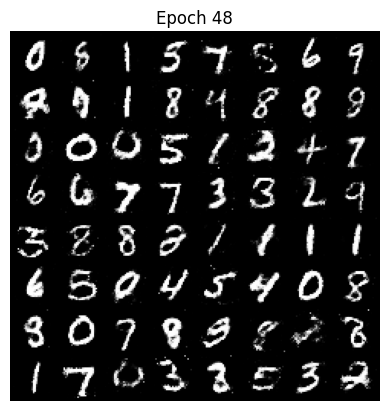

Epoch 49/50 Batch 0/469 Loss D: 1.2493, loss G: 0.8391
Epoch 49/50 Batch 200/469 Loss D: 1.2307, loss G: 0.9531
Epoch 49/50 Batch 400/469 Loss D: 1.3506, loss G: 1.1927


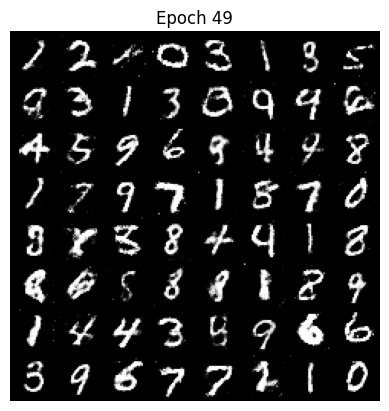

In [ ]:
#training loop
for epoch in range(epochs):
  for i, (real_imgs, _) in enumerate(dataloader):
    real_imgs = real_imgs.to(device)
    batch_size = real_imgs.size(0)

    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)

    #D
    z = torch.randn(batch_size, latent_dim).to(device)
    fake_imgs = generator(z)

    real_loss = criterion(discriminator(real_imgs), real_labels)
    fake_loss = criterion(discriminator(fake_imgs.detach()), fake_labels)
    d_loss = real_loss + fake_loss

    optimizer_D.zero_grad()
    d_loss.backward()
    optimizer_D.step()

    #G
    z = torch.randn(batch_size, latent_dim).to(device)
    generated_imgs = generator(z)

    g_loss = criterion(discriminator(generated_imgs), real_labels)

    optimizer_G.zero_grad()
    g_loss.backward()
    optimizer_G.step()

    if i % 200 == 0:
      print(f"Epoch {epoch}/{epochs} Batch {i}/{len(dataloader)} Loss D: {d_loss.item():.4f}, loss G: {g_loss.item():.4f}")

  with torch.no_grad():
    fake = generator(torch.randn(64, latent_dim).to(device)).detach().cpu()
    grid = make_grid(fake, nrow=8, normalize=True)
    plt.imshow(grid.permute(1,2,0).numpy())
    plt.title(f"Epoch {epoch}")
    plt.axis("off")
    plt.show()